# Notes

## Set-up

### Packages

In [26]:
import random

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

sns.set_theme()

## The Euro Problem

“A statistical statement appeared in The Guardian on Friday January 4, 2002:

>When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. "It looks very suspicious to me," said Barry Blight, a statistics lecturer at the London School of Economics. "If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.:

“But [MacKay asks] do these data give evidence that the coin is biased rather than fair?”

## The Binomial Distribution

If the coin were fair, the distribution would look as follows:

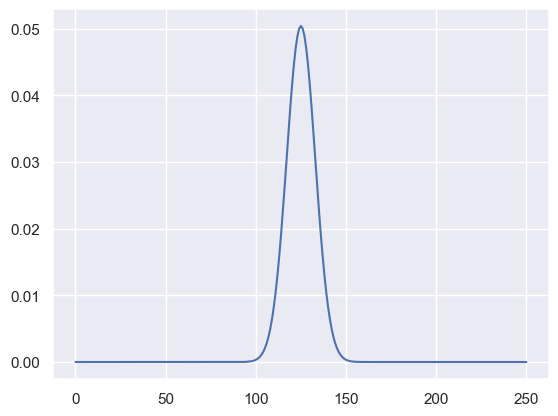

In [8]:
n = 250
p = 0.5
coin_dist = stats.binom(n, p)

fig, ax = plt.subplots()

n_heads = np.arange(0, n + 1)
ax.plot(n_heads, coin_dist.pmf(n_heads))

ax.set(
    xlabel="Number of Heads",
    ylabel="Probability",
    title="Distribution of Number of Heads",
);

The probability of getting a result 'as extreme as' 140 heads is the probability of at least 140 heads plus the probability of fewer than or equal to 110 heads.

In [15]:
prob = (1 - coin_dist.cdf(139)) + coin_dist.cdf(110)
print(f"Probability of a result this extreme with a fair coin: {prob:.3f}")

Probability of a result this extreme with a fair coin: 0.066


## Bayesian Estimation

Treat the probability of a heads as a random variable. We initially assume that all values between 0 and 1 are equally likely (a uniform prior) and perform Bayesian updates to the distribution after each coin toss.

Annoyingly `scipy.stats` wants discrete uniform distributions to take integer values, so we should think of, e.g. 3 representing 0.03.

In [20]:
def bayesian_update(prior, likelihoods):
    "returns posterior after Bayesian update"
    support = prior.support()
    possible_outcomes = range(support[0], support[1] + 1)
    outcomes = [outcome for outcome in possible_outcomes if prior.pmf(outcome) != 0]
    
    posterior_probs = []
    for outcome in outcomes:
        posterior_probs.append(prior.pmf(outcome) * likelihoods[outcome])

    posterior_probs = [prob / sum(posterior_probs) for prob in posterior_probs]
    posterior = stats.rv_discrete(values=[outcomes, posterior_probs])

    return posterior

KeyboardInterrupt: 

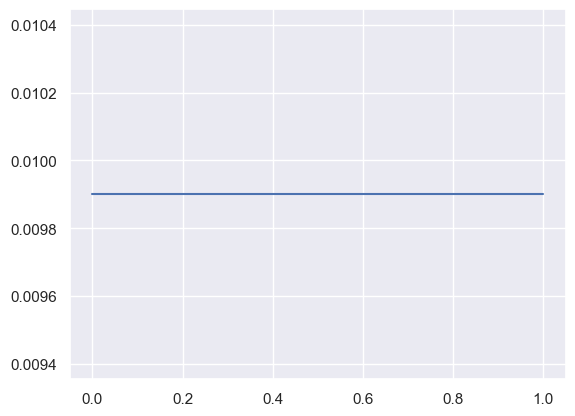

In [34]:
prior = stats.randint(0, 101)

likelihoods = {
    "H": np.linspace(0, 1, 101),
    "T": 1 - np.linspace(0, 1, 101),
}

coin_flip_results = ["H"] * 140 + ["T"] * 110
random.shuffle(coin_flip_results)

fig, ax = plt.subplots()

x_val = np.arange(101)

ax.plot(x_val/100, prior.pmf(x_val))

posterior = prior
for result in coin_flip_results:
    posterior = bayesian_update(posterior, likelihoods[result])  
    ax.plot(x_val/100, posterior.pmf(x_val))

ax.set(
    xlabel="Probability",
    ylabel="Heads Probability",
    title="Distribution of Heads Probability After Bayesian Updates",
);

In [33]:
map_prob = np.argmax(np.array([posterior.pmf(i) for i in np.arange(101)]))
print(f"Most likely heads probability: {map_prob / 100}")

Most likely heads probability: 1.4


Q: Why aren't we working with continuous distributions?